In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('players_22.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
# Check the column names
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [4]:
# Total number of numeric values
df.select_dtypes(include='number')

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,213694,69,70,1600000.0,8000.0,26,178,73,1898.0,1.0,...,54.0,27.0,36.0,33.0,7.0,16.0,8.0,13.0,10.0,NaN
5768,213699,69,73,2000000.0,24000.0,25,188,78,1795.0,1.0,...,62.0,17.0,32.0,23.0,14.0,8.0,12.0,8.0,8.0,NaN
5769,213905,69,71,1800000.0,20000.0,25,193,75,3.0,2.0,...,59.0,40.0,41.0,43.0,12.0,11.0,16.0,13.0,8.0,NaN
5770,213948,69,69,1500000.0,6000.0,26,168,65,1939.0,2.0,...,65.0,49.0,52.0,53.0,8.0,10.0,12.0,10.0,9.0,NaN


In [5]:
# Let's check the shape of the data
df.shape

(5772, 110)

In [6]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

## Descriptive Statistics

In [7]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,5772.000000,5772.000000,5772.000000,5.735000e+03,5740.000000,5772.000000,5772.000000,5772.000000,5740.000000,5739.000000,...,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,568.000000
mean,215053.125606,73.730942,75.957034,7.577282e+06,23861.219512,27.619196,181.527200,76.015766,33229.544948,1.136261,...,68.047825,53.456767,54.019754,51.158205,16.789811,16.566106,16.394559,16.764339,16.919598,43.373239
std,25796.382201,3.806513,4.807206,1.268634e+07,30547.972586,4.152879,6.882869,7.136557,49583.956940,0.356546,...,9.422279,21.237976,22.752210,22.777587,19.215606,18.419300,17.867249,18.973536,19.679876,9.069677
min,41.000000,69.000000,69.000000,1.500000e+05,500.000000,17.000000,158.000000,55.000000,1.000000,1.000000,...,12.000000,4.000000,7.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,200198.750000,71.000000,72.000000,1.900000e+06,8000.000000,25.000000,177.000000,71.000000,226.000000,1.000000,...,64.000000,35.000000,33.000000,29.000000,8.000000,8.000000,8.000000,8.000000,8.000000,38.000000
50%,216687.000000,73.000000,75.000000,3.300000e+06,15000.000000,28.000000,182.000000,76.000000,1035.000000,1.000000,...,69.000000,63.000000,65.000000,62.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000
75%,233148.000000,76.000000,79.000000,7.000000e+06,28000.000000,31.000000,187.000000,81.000000,101083.250000,1.000000,...,74.000000,71.000000,73.000000,71.000000,14.000000,14.000000,14.000000,14.000000,14.000000,50.000000
max,264348.000000,93.000000,95.000000,1.940000e+08,350000.000000,43.000000,202.000000,103.000000,115716.000000,3.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


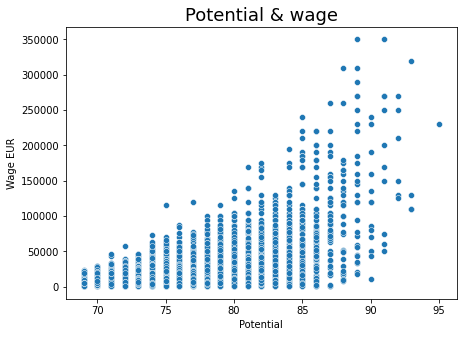

In [11]:
# Inspecting the relationship between player potential and wages
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

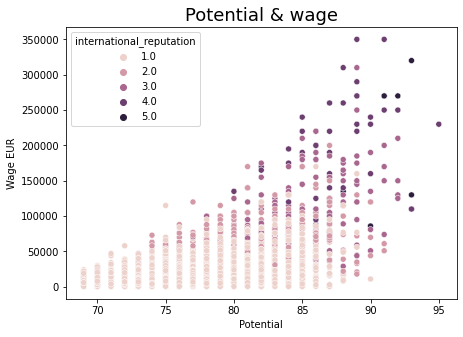

In [12]:
# Let's plot the relationship between player potential and wages, filtered by International reputation

plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =df['potential'], y = df['wage_eur'], hue = df['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

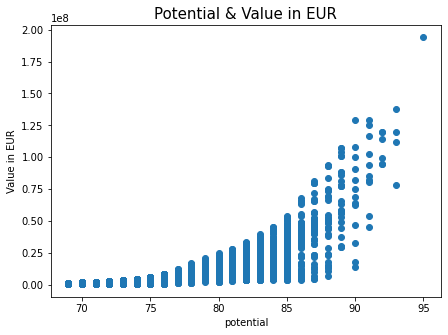

In [13]:
# Let's plot the relationship between player potential and value

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['potential'], y=df['value_eur'] )
plt.xlabel("potential") 
plt.ylabel("Value in EUR")
plt.title("Potential & Value in EUR", fontsize = 15)
plt.show()

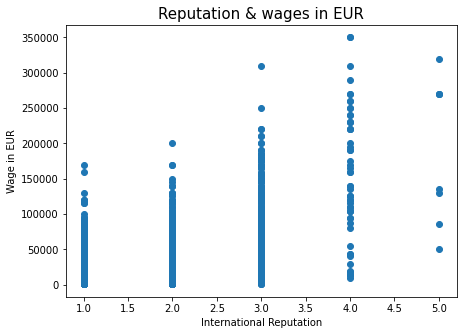

In [14]:
# Let's plot the relationship between player reputation and wages
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=df['international_reputation'], y=df['wage_eur'] )
plt.xlabel("International Reputation") 
plt.ylabel("Wage in EUR")
plt.title("Reputation & wages in EUR", fontsize = 15)
plt.show()

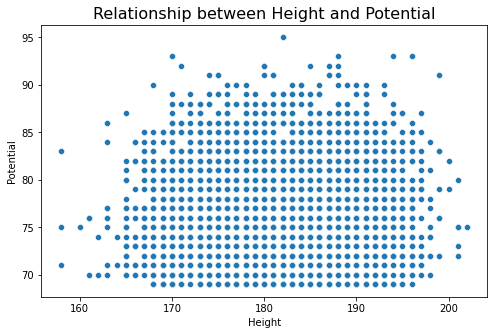

In [15]:
# Let's plot the relationship between player height and potential
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.scatterplot(x =df['height_cm'], y = df['potential'])
plt.xlabel("Height") 
plt.ylabel("Potential")
plt.title("Relationship between Height and Potential", fontsize = 16)
plt.show()